# Textual Data in Lily

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random as rd
import re
import nn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

---
## Data Import

In [22]:
data = pd.read_excel('/Users/desiredewaele/Google Drive/Datasets/lily text.xlsx', index_col=0)
data.tail(3)

,Panellid,E-mailadres,Achternaam,Voornaam,Taal,Geslacht,Geboortedatum,Veld 1,Veld 5,Straat,...,6.4. onze website,7.1. Naamsbekendheid,7.2. Prijs,7.3. Contact met de klantendienst,7.4. Groene energie,"7.5. Advies vrienden, familie, collega's",7.6. Duidelijkheid en correctheid facturen,7.7. Other,"7.7. Ander, gelieve te specificeren",prijskwaliteit
Respondent,,,,,,,,,,,,,,,,,,,,,
10398,35855057,gaston@f-a-q.be,Gaston Verelst,NaN,nl,Man,NaN,150153215.0,NaN,Groenstraat,...,NVT,Niet belangrijk,Uiterst belangrijk,Belangrijk,Niet belangrijk,Niet belangrijk,Uiterst belangrijk,NaN,NaN,8.0
10399,35855871,familiewilms@hotmail.com,Wilhelmus Wilms,NaN,nl,Man,NaN,150346421.0,NaN,Koekoeklaan,...,NVT,Niet belangrijk,Zeer belangrijk,Niet belangrijk,Niet belangrijk,NaN,Belangrijk,NaN,NaN,4.0
10400,35855594,doke.brouns@telenet.be,Doke Brouns,NaN,nl,Vrouw,NaN,150136365.0,NaN,Steenberg,...,6,Niet belangrijk,Uiterst belangrijk,Belangrijk,Belangrijk,Belangrijk,Zeer belangrijk,NaN,NaN,3.0


---
## Data Preproccessing

---
### Feature Selection

In [23]:
dataNL = data[data.Taal=='nl'].iloc[:,31:35]
dataFR = data[data.Taal=='fr'].iloc[:,31:35]
dataNL.columns = ['label', 'text1', 'text2', 'text3']
dataFR.columns = ['label', 'text1', 'text2', 'text3']
del data

In [24]:
dataNL.tail()

,label,text1,text2,text3
Respondent,,,,
10396,7,NaN,NaN,NaN
10397,8,NaN,NaN,lagere prijzen ???
10398,6,Ik denk niet dat Essent beter of slechter is d...,NaN,NaN
10399,5,rekening even hoog als bij vorige leverancier,NaN,NaN
10400,5,Duur,NaN,NaN


---
### Feature Formatting

In [25]:
dataNL.text1 = dataNL.text1.apply(lambda x: x.encode('utf8') if isinstance(x, unicode) else ' ')
dataNL.text2 = dataNL.text2.apply(lambda x: x.encode('utf8') if isinstance(x, unicode) else ' ')
dataNL.text3 = dataNL.text3.apply(lambda x: x.encode('utf8') if isinstance(x, unicode) else ' ')

In [26]:
dataNL['text'] = dataNL.text1.str.cat(dataNL.text2).str.cat(dataNL.text3)
dataNL = dataNL[['label', 'text']]

In [27]:
def textconverter(text):
    text = text.lower()                      # Change text to lowercase
    text = re.sub('[^(a-z)]| ', ' ', text)   # Change all not-text to spaces
    text = re.sub(' +',' ',text)             # Remove all redundant spaces
    text = text.strip()                      # Remove outer whitespace
    return text

In [28]:
dataNL.text = dataNL.text.apply(lambda x: textconverter(x))
dataNL.tail()

,label,text
Respondent,,
10396,7,
10397,8,lagere prijzen
10398,6,ik denk niet dat essent beter of slechter is d...
10399,5,rekening even hoog als bij vorige leverancier
10400,5,duur


---
### Missing Values

In [29]:
dataNL = dataNL[dataNL.text != '']
dataNL.tail()

,label,text
Respondent,,
10395,5,er
10397,8,lagere prijzen
10398,6,ik denk niet dat essent beter of slechter is d...
10399,5,rekening even hoog als bij vorige leverancier
10400,5,duur


In [30]:
len(dataNL)

3181

---
### Label Formatting

In [31]:
print(len(dataNL[dataNL.label > 7]))
print(len(dataNL[dataNL.label <= 7]))

1503
1678


In [32]:
dataNL.label = dataNL.label.apply(lambda x: 1 if x > 7 else 0)
dataNL.tail()

,label,text
Respondent,,
10395,0,er
10397,1,lagere prijzen
10398,0,ik denk niet dat essent beter of slechter is d...
10399,0,rekening even hoog als bij vorige leverancier
10400,0,duur


---
## Get Word Counts & Tfidfs with Sklearn

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

a = CountVectorizer()
b = CountVectorizer(ngram_range=(1, 2))
c = CountVectorizer(ngram_range=(1, 3))
d = TfidfVectorizer(sublinear_tf=True)
e = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3))
f = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3))

In [34]:
onegrams = pd.DataFrame(a.fit_transform(dataNL.text).toarray(), columns=a.get_feature_names())
twograms = pd.DataFrame(b.fit_transform(dataNL.text).toarray(), columns=b.get_feature_names())
trigrams = pd.DataFrame(c.fit_transform(dataNL.text).toarray(), columns=c.get_feature_names())
onetfidf = pd.DataFrame(d.fit_transform(dataNL.text).toarray(), columns=d.get_feature_names())
twotfidf = pd.DataFrame(e.fit_transform(dataNL.text).toarray(), columns=e.get_feature_names())
tritfidf = pd.DataFrame(f.fit_transform(dataNL.text).toarray(), columns=f.get_feature_names())

In [35]:
tritfidf.tail()

,aagesloten,aagesloten via,aagesloten via groepsaankoop,aan,aan als,aan als de,aan andere,aan andere dat,aan anderen,aan anderen hoeft,...,zwart op,zwart op wit,zweem,zweem van,zweem van onbereikbaarheid,zyn,zyn ben,zyn ben aant,zyn voor,zyn voor nieuwe
3176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
def getTopValues(s):
    tmp = s.sort_values(ascending=False)[:3]
    return tuple(tmp.index) #dict(zip(tmp.index, tmp))

In [37]:
onegrams.apply(getTopValues, axis=1).tail()

3176              (er, zyn, geraakt)
3177          (prijzen, lagere, zyn)
3178               (essent, dat, of)
3179    (leverancier, rekening, bij)
3180         (duur, zyn, geschreven)
dtype: object

---
## Logistic Regression

In [100]:
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(tritfidf.as_matrix(), dataNL.label, train_size=0.7)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

lr = LogisticRegression()         # Logistic Regression
nb = GaussianNB()                 # Gaussian Naive Bayes
sd = SGDClassifier()              # Stochastic Gradient Descent
dt = DecisionTreeClassifier()     # Decision Tree
ft = RandomForestClassifier()     # Random Forrest Tree
et = ExtraTreesClassifier()       # Extra Trees

In [128]:
lr.fit(trainX, trainY)
#nb.fit(trainX, trainY)
#sd.fit(trainX, trainY)
#dt.fit(trainX, trainY)
#ft.fit(trainX, trainY)
#et.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
print(lr.score(validX, validY))
#print(nb.score(validX, validY))
#print(sd.score(validX, validY))
#print(dt.score(validX, validY))
#print(ft.score(validX, validY))
#print(et.score(validX, validY))

0.702617801047


In [130]:
print(lr.score(trainX, trainY))
#print(nb.score(trainX, trainY))
#print(sd.score(trainX, trainY))
#print(dt.score(trainX, trainY))
#print(ft.score(trainX, trainY))
#print(et.score(trainX, trainY))

0.916891284816


In [131]:
predictions = dataNL.loc[validY[:10].index]
predictions['predictions'] = lr.predict(validX[:10])
predictions

,label,text,predictions
Respondent,,,
8490,0,energiemarkt die van langs om meer opengaat en...,0
1047,0,weet ik echt niet,0
6506,1,nooit problemen en bij de voordeligste in belgie,1
3530,1,ik vind de goedkoopste prijs,1
2742,1,een goede dienst,1
2703,0,even als de anderen,0
3132,1,de mensen die aan de telefoon zitten zouden ju...,0
3703,0,de goedkoopste zijn bij de groepsaankoop van d...,0
8921,1,zelf voordeligere tarieven voorstellen ipv dat...,0


---
## Neural Network

---
### Visualizer Functions
These are some helper functions

In [47]:
def plotter(history):
    at, av, lt, lv = zip(*history)
    fig = plt.figure(figsize=(15, 8)); ax1 = fig.add_subplot(221); ax2 = fig.add_subplot(222)

    ax1.plot(np.arange(0, len(at), 1), at,".-", color='#2A6EA6', label="Training: {0:.2f}%".format(at[-1]))
    ax1.plot(np.arange(0, len(av), 1), av,".-", color='#FFA933', label="Validation: {0:.2f}%".format(av[-1]))
    ax1.grid(True); ax1.legend(loc="lower right"); ax1.set_title("Accuracy per epoch")

    ax2.plot(np.arange(0, len(lt), 1), lt,".-", color='#2A6EA6', label="Training: {0:.2f}".format(lt[-1]))
    ax2.plot(np.arange(0, len(lv), 1), lv,".-", color='#FFA933', label="Validation: {0:.2f}".format(lv[-1]))
    ax2.grid(True); ax2.legend(loc="upper right"); ax2.set_title("Cost per epoch")
    plt.show()

---
### Data Preproccessing
Reformat into a TensorFlow-friendly shape:
- all input should be numpy
- labels as float 1-hot encodings.

In [48]:
print('Training set:', twotfidf.shape, dataNL.label.shape)

('Training set:', (3181, 50160), (3181,))


In [49]:
data = twotfidf.values
labels = pd.get_dummies(dataNL.label).values

In [50]:
print('Training set:', data.shape, labels.shape)

('Training set:', (3181, 50160), (3181, 2))


In [51]:
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data, labels, train_size=0.7)

In [52]:
print('Training set:', trainX.shape, trainY.shape)
print('Validation set:', validX.shape, validY.shape)

('Training set:', (2226, 50160), (2226, 2))
('Validation set:', (955, 50160), (955, 2))


In [53]:
SIZE = trainX.shape[1]
LABELS = 2
BREAKS = 5
BATCH = 64
HIDDEN1 = 10
RATE = 0.01
STEPS = 100

In [54]:
graph = tf.Graph()
with graph.as_default():

    # Input data.
    tfDataX = tf.placeholder(tf.float32, shape=(None, SIZE))
    tfDataY = tf.placeholder(tf.float32, shape=(None, LABELS))

    # Variables.
    w1 = tf.Variable(tf.truncated_normal([SIZE, HIDDEN1], stddev=np.sqrt(2.0/SIZE)))
    w2 = tf.Variable(tf.truncated_normal([HIDDEN1, LABELS], stddev=np.sqrt(2.0/SIZE)))
    b1 = tf.Variable(tf.zeros([HIDDEN1]))
    b2 = tf.Variable(tf.zeros([LABELS]))

    # Model.
    def model(x, training=False):
        x = tf.nn.relu(tf.matmul(x, w1) + b1)
        return tf.matmul(x, w2) + b2
  
    # Training computation.
    logits = model(tfDataX, training=True)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tfDataY))
    rate = tf.train.exponential_decay(0.5, tf.Variable(0), 4000, 0.65, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(RATE).minimize(loss)

    # Predictions and Accuracy.
    predictions = {"classes": tf.argmax(model(tfDataX), axis=1),"probabilities": tf.nn.softmax(model(tfDataX))}
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(predictions["classes"], tf.argmax(tfDataY, axis=1)))) * 100

In [55]:
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    history = []
    for step in range(STEPS):
        offset = (step * BATCH) % (trainY.shape[0] - BATCH)
        batchX = trainX[offset:(offset + BATCH), :]
        batchY = trainY[offset:(offset + BATCH), :]
        session.run(optimizer, {tfDataX: trainX, tfDataY: trainY})
        if(step % (STEPS // BREAKS) == 0):
            lt, at = session.run([loss, accuracy], {tfDataX: trainX, tfDataY: trainY})
            lv, av = session.run([loss, accuracy], {tfDataX: validX, tfDataY: validY})
            history.append((at, av, lt, lv))
            print ".",
    predictions = session.run(predictions, {tfDataX: validX})
    #accuracy = session.run(accuracy, {tfDataX: testX, tfDataY: testY})
    #print('\nTest accuracy: %.2f%%' % accuracy)

. . . . .


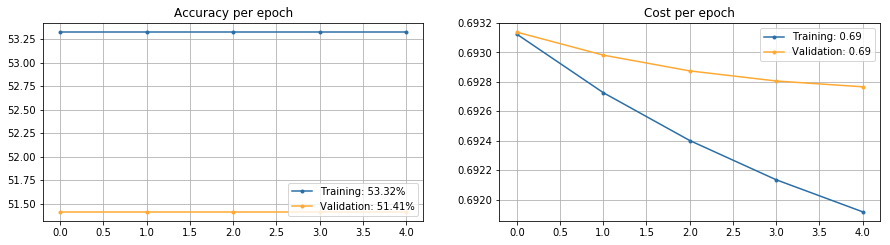

In [56]:
plotter(history)